<a href="https://colab.research.google.com/github/junghyun9108/NLP_class/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install selenium
!pip install konlpy wordcloud
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 13 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [79]:
import re
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

In [80]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://news.naver.com/"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

네이버 뉴스


In [81]:
comment_texts = driver.find_elements(By.CLASS_NAME, 'comment_text')
for tmp in comment_texts:
    print(tmp.text)

In [82]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [83]:
import re

clean_titles = []

# strong 태그에 클래스가 cnf_news_title인 요소 모두 선택
titles = soup.select('strong.cnf_news_title')

# 텍스트만 출력
for tag in titles:
    raw = tag.get_text(strip=True)
    clean = re.sub(r'^\[.*?\]\s*', '', raw)
    clean_titles.append(clean)

print(clean_titles)

['SKT 해킹…유심칩 꼭 바꿔야 할까', '“어머니의 마지막 선물”… 유품 정리하다 발견한 복권, 3400만원 당첨', '산림청 "대구 북구 산불 진화율 54%"', "대구 산불 확산에 '국가소방동원령'…요양시설 거주자 61명 대피(종합2보)", '"조선일보, 이재명 공공병원 공약 비판하려 왜곡보도"', '정부, 지역별 차등전기료 제동', 'Korea’s per capita GDP set to fall below 2022 levels: IMF', '공식 후보 된 이재명, 한덕수에 직격탄…"헌재 판결 무시, 명확한 헌법 파괴행위이자 사실상 내란행위"', '한덕수 앞에 세 개의 산…① 지지율 ② 국힘 후보 ③ 계엄 심판론', "Wildfire on Daegu's Mount Hamji tears through 140 acres", "이승만 참배, 윤여준 영입...'통합' 내걸고 본선 돌입", '대구 산불 확산에 요양시설 거주자 61명 대피', '1분기 날아오른 한화오션…필리조선소 흑자는 "아직"', '"집앞까지 불씨, 상상도 못했다" 산불 공포, 잠 못드는 대구', '이재명 "역사적 인물에 대한 평가가 정치적 갈등 소재 되는 것 안타까워"', '"해킹한 개인정보 2000만원에 팝니다"…콜센터·GA도 해킹됐다', '프란치스코 교황이 남긴 것', '5만원대 ‘갤럭시 S25’ 내놨다···SKT, 가입자 이탈에 비상', '산림청 “대구 북구 산불 진화율 54%”', '봉지욱 등 \'공소기각\' 주장에... 尹 명예훼손 재판부 "일단 재판"', '"가족 전부 SKT라도 바꿔"…주가 \'휘청\'에 투심도 번호 이동', '피고인석 2열 앉은 그 남자의 ‘눈 가리고 아웅’', '알짜기업 오아시스가 적자기업 티몬 품으면 벌어질 일', '전국 대기 건조하고 강풍...봄철 폐 건강에 좋은 음식', "중국, 정부 주도로 '비밀경찰' 통해 반체제인사 탄압 의혹", "대구 산불 확산 주민 5600명 긴급 대피...\xa0'국가소방동원령' 발령", '대학원생 성폭행한 교수, "1억 안주면 

In [84]:
text = ' '.join(clean_titles)

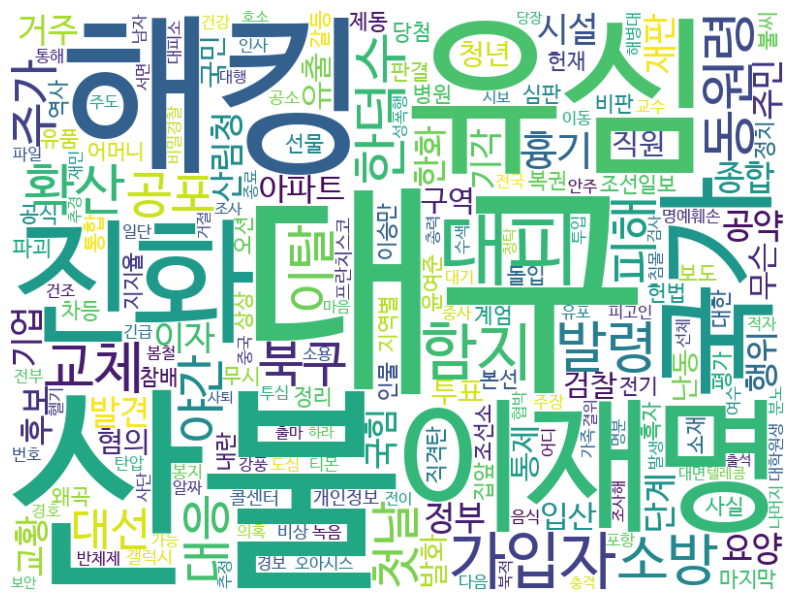

In [85]:
# 3. 형태소 분석기로 명사만 추출 (길이 2자 이상 필터)
okt = Okt()
nouns = okt.nouns(text)
filtered = [word for word in nouns if len(word) > 1]

# 4. 단어 빈도 계산
counts = Counter(filtered)

# 5. 워드클라우드 생성
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    background_color='white',
    width=800,
    height=600
)
wc.generate_from_frequencies(counts)

# 6. 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

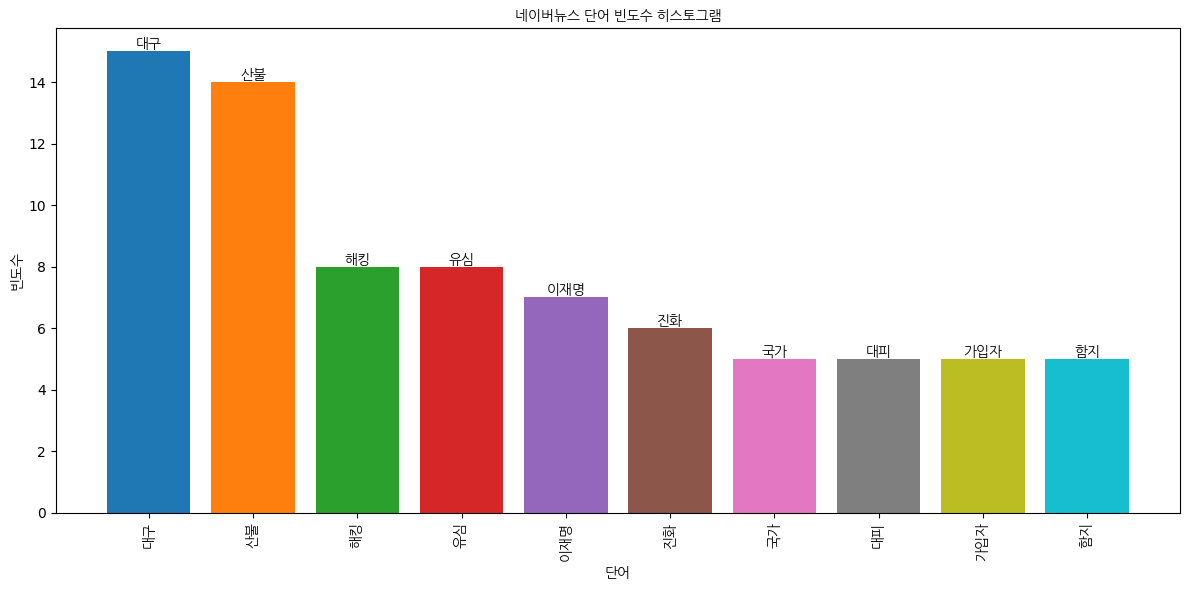

In [91]:

# # 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)


# 탑 10 빈도 추출
top10_counts = counts.most_common(10)  # 빈도수 상위 10개 추출
words = [word for word, freq in top10_counts]
frequencies = [freq for word, freq in top10_counts]

# 히스토그램 생성
plt.figure(figsize=(12, 6))

# 막대 생성 및 텍스트 추가
for i, (word, frequency) in enumerate(zip(words, frequencies)):
    bar = plt.bar(i, frequency, label=word)
    text = plt.text(
        bar[0].get_x() + bar[0].get_width() / 2,
        bar[0].get_height(),
        word,
        ha='center',
        va='bottom',
        fontproperties=fontprop
    )

plt.title('네이버뉴스 단어 빈도수 히스토그램', fontproperties=fontprop)
plt.xlabel('단어', fontproperties=fontprop)
plt.ylabel('빈도수', fontproperties=fontprop)
plt.xticks(range(len(words)), words, rotation=90 , fontproperties=fontprop)  # x축 눈금 레이블에 폰트 설정
plt.tight_layout()
plt.show()